In [1]:
from requests.compat import urlparse, urlunparse, urljoin
from bs4 import BeautifulSoup
import re
import requests
from requests import Session, request, get
from urllib.request import urlopen
import os
import pandas as pd
import numpy as np
from functools import reduce ## 추가 ##
import sqlite3

import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("./style_review_EDA.csv")

In [7]:
data

goodsId  reviewId  reviewDate  \
0        947067   7997463  2020.01.21   
1        947067   4067306  2019.02.27   
2        947067   8468969  2020.02.28   
3        947067   7182239  2019.11.20   
4        947067   7001487  2019.11.08   
...         ...       ...         ...   
399552  1165926  30180427  2022.07.08   
399553  1165926  30180427  2022.07.08   
399554  1165926  30145259  2022.07.07   
399555  1165926  29187788  2022.06.09   
399556  1165926  28858969  2022.05.30   

                                           reviewImageUrl  \
0       https://image.msscdn.net/data/estimate/947067_...   
1       https://image.msscdn.net/data/estimate/947067_...   
2       https://image.msscdn.net/data/estimate/947067_...   
3       https://image.msscdn.net/data/estimate/947067_...   
4       https://image.msscdn.net/data/estimate/947067_...   
...                                                   ...   
399552  https://image.msscdn.net/data/estimate/1165926...   
399553  https://image.msscdn.net/data/estimate/1165926...   
399554  https://image.msscdn.net/data/estimate/1165926...   
399555  https://image.msscdn.net/data/estimate/1165926...   
399556  https://image.msscdn.net/data/estimate/1165926...   

                                          reviewRecomment  label    idx  \
0                                                     NaN    NaN      0   
1                                                     NaN    NaN      0   
2                                                     NaN    NaN      0   
3       안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기...    4.0      0   
4       안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기...    4.0      0   
...                                                   ...    ...    ...   
399552                                                NaN    NaN  34153   
399553                                                NaN    NaN  34153   
399554                                                NaN    NaN  34153   
399555                                                NaN    NaN  34153   
399556                                                NaN    NaN  34153   

        major_category  mid_category  goods_id  \
0                    1          1005    947067   
1                    1          1005    947067   
2                    1          1005    947067   
3                    1          1005    947067   
4                    1          1005    947067   
...                ...           ...       ...   
399552               3          3005   1165926   
399553               3          3005   1165926   
399554               3          3005   1165926   
399555               3          3005   1165926   
399556               3          3005   1165926   

                                        goods_url  \
0        https://www.musinsa.com/app/goods/947067   
1        https://www.musinsa.com/app/goods/947067   
2        https://www.musinsa.com/app/goods/947067   
3        https://www.musinsa.com/app/goods/947067   
4        https://www.musinsa.com/app/goods/947067   
...                                           ...   
399552  https://www.musinsa.com/app/goods/1165926   
399553  https://www.musinsa.com/app/goods/1165926   
399554  https://www.musinsa.com/app/goods/1165926   
399555  https://www.musinsa.com/app/goods/1165926   
399556  https://www.musinsa.com/app/goods/1165926   

                                              goods_image  
0       https://image.msscdn.net/images/goods_img/2019...  
1       https://image.msscdn.net/images/goods_img/2019...  
2       https://image.msscdn.net/images/goods_img/2019...  
3       https://image.msscdn.net/images/goods_img/2019...  
4       https://image.msscdn.net/images/goods_img/2019...  
...                                                   ...  
399552  https://image.msscdn.net/images/goods_img/2019...  
399553  https://image.msscdn.net/images/goods_img/2019...  
399554  https://image.msscdn.net/images/goods_img/2019...  
399555  https://image.msscdn.net/images/goo

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399557 entries, 0 to 399556
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   goodsId          399557 non-null  int64  
 1   reviewId         399557 non-null  int64  
 2   reviewDate       399557 non-null  object 
 3   reviewImageUrl   399364 non-null  object 
 4   reviewRecomment  57327 non-null   object 
 5   label            57327 non-null   float64
 6   idx              399557 non-null  int64  
 7   major_category   399557 non-null  int64  
 8   mid_category     399557 non-null  int64  
 9   goods_id         399557 non-null  int64  
 10  goods_url        399557 non-null  object 
 11  goods_image      399557 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 36.6+ MB


In [10]:
data['reviewImageUrl'][0]

'https://image.msscdn.net/data/estimate/947067_0/gallery_5e25e7cf06ad3.jpg'

In [262]:
mask = data['label'].isin([4.0])
data = data[~mask]

In [263]:
data 

goodsId  reviewId  reviewDate  \
0        947067   7997463  2020.01.21   
1        947067   4067306  2019.02.27   
2        947067   8468969  2020.02.28   
5        947067   4026710  2019.03.04   
6        947067  32574067  2022.09.19   
...         ...       ...         ...   
399448  1165926  30180427  2022.07.08   
399449  1165926  30180427  2022.07.08   
399450  1165926  30145259  2022.07.07   
399451  1165926  29187788  2022.06.09   
399452  1165926  28858969  2022.05.30   

                                           reviewImageUrl reviewRecomment  \
0       https://image.msscdn.net/data/estimate/947067_...             NaN   
1       https://image.msscdn.net/data/estimate/947067_...             NaN   
2       https://image.msscdn.net/data/estimate/947067_...             NaN   
5       https://image.msscdn.net/data/estimate/947067_...             NaN   
6       https://image.msscdn.net/data/estimate/947067_...             NaN   
...                                                   ...             ...   
399448  https://image.msscdn.net/data/estimate/1165926...             NaN   
399449  https://image.msscdn.net/data/estimate/1165926...             NaN   
399450  https://image.msscdn.net/data/estimate/1165926...             NaN   
399451  https://image.msscdn.net/data/estimate/1165926...             NaN   
399452  https://image.msscdn.net/data/estimate/1165926...             NaN   

        label  
0         NaN  
1         NaN  
2         NaN  
5         NaN  
6         NaN  
...       ...  
399448    NaN  
399449    NaN  
399450    NaN  
399451    NaN  
399452    NaN  

[352856 rows x 6 columns]

(array([1697.,    0.,    0.,    0.,    0., 7467.,    0.,    0.,    0.,
        1534.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

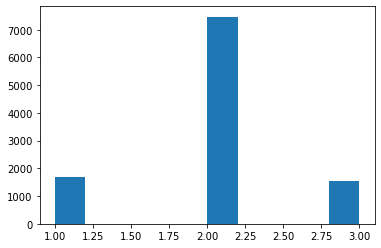

In [267]:
plt.hist(data['label'])

In [269]:
data.label.value_counts()

2.0    7467
1.0    1697
3.0    1534
Name: label, dtype: int64

In [273]:
import seaborn as sns

In [274]:
data.corr()

goodsId  reviewId     label
goodsId   1.000000  0.467378  0.037498
reviewId  0.467378  1.000000 -0.025991
label     0.037498 -0.025991  1.000000

In [275]:
from pandas_profiling import ProfileReport

In [276]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [279]:
data['label'].fillna(0, inplace=True)

C:\Users\panda\AppData\Local\Temp\ipykernel_105748\3674785822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'].fillna(0, inplace=True)


In [280]:
data

goodsId  reviewId  reviewDate  \
0        947067   7997463  2020.01.21   
1        947067   4067306  2019.02.27   
2        947067   8468969  2020.02.28   
5        947067   4026710  2019.03.04   
6        947067  32574067  2022.09.19   
...         ...       ...         ...   
399448  1165926  30180427  2022.07.08   
399449  1165926  30180427  2022.07.08   
399450  1165926  30145259  2022.07.07   
399451  1165926  29187788  2022.06.09   
399452  1165926  28858969  2022.05.30   

                                           reviewImageUrl reviewRecomment  \
0       https://image.msscdn.net/data/estimate/947067_...             NaN   
1       https://image.msscdn.net/data/estimate/947067_...             NaN   
2       https://image.msscdn.net/data/estimate/947067_...             NaN   
5       https://image.msscdn.net/data/estimate/947067_...             NaN   
6       https://image.msscdn.net/data/estimate/947067_...             NaN   
...                                                   ...             ...   
399448  https://image.msscdn.net/data/estimate/1165926...             NaN   
399449  https://image.msscdn.net/data/estimate/1165926...             NaN   
399450  https://image.msscdn.net/data/estimate/1165926...             NaN   
399451  https://image.msscdn.net/data/estimate/1165926...             NaN   
399452  https://image.msscdn.net/data/estimate/1165926...             NaN   

        label  
0         0.0  
1         0.0  
2         0.0  
5         0.0  
6         0.0  
...       ...  
399448    0.0  
399449    0.0  
399450    0.0  
399451    0.0  
399452    0.0  

[352856 rows x 6 columns]

In [281]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399452 entries, 0 to 399451
Data columns (total 6 columns):
 #   Column                                                                     Non-Null Count   Dtype  
---  ------                                                                     --------------   -----  
 0   947067                                                                     399452 non-null  int64  
 1   7997463                                                                    399452 non-null  int64  
 2   2020.01.21                                                                 399452 non-null  object 
 3   https://image.msscdn.net/data/estimate/947067_0/gallery_5e25e7cf06ad3.jpg  399259 non-null  object 
 4   Unnamed: 4                                                                 57295 non-null   object 
 5   Unnamed: 5                                                                 57295 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usa

In [7]:
data_1 = pd.read_csv("./musinsa_style_review_1.csv")

In [8]:
data_1

goodsId  reviewId  reviewDate  \
0        947067   7997463  2020.01.21   
1        947067   4067306  2019.02.27   
2        947067   8468969  2020.02.28   
3        947067   7182239  2019.11.20   
4        947067   7001487  2019.11.08   
...         ...       ...         ...   
399432  1165926  30180427  2022.07.08   
399433  1165926  30180427  2022.07.08   
399434  1165926  30145259  2022.07.07   
399435  1165926  29187788  2022.06.09   
399436  1165926  28858969  2022.05.30   

                                           reviewImageUrl  \
0       https://image.msscdn.net/data/estimate/947067_...   
1       https://image.msscdn.net/data/estimate/947067_...   
2       https://image.msscdn.net/data/estimate/947067_...   
3       https://image.msscdn.net/data/estimate/947067_...   
4       https://image.msscdn.net/data/estimate/947067_...   
...                                                   ...   
399432  https://image.msscdn.net/data/estimate/1165926...   
399433  https://image.msscdn.net/data/estimate/1165926...   
399434  https://image.msscdn.net/data/estimate/1165926...   
399435  https://image.msscdn.net/data/estimate/1165926...   
399436  https://image.msscdn.net/data/estimate/1165926...   

                                          reviewRecomment  
0                                                     NaN  
1                                                     NaN  
2                                                     NaN  
3       안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기...  
4       안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기...  
...                                                   ...  
399432                                                NaN  
399433                                                NaN  
399434                                                NaN  
399435                                                NaN  
399436                                                NaN  

[399437 rows x 5 columns]

In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399437 entries, 0 to 399436
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   goodsId          399437 non-null  int64 
 1   reviewId         399437 non-null  int64 
 2   reviewDate       399437 non-null  object
 3   reviewImageUrl   399244 non-null  object
 4   reviewRecomment  57279 non-null   object
dtypes: int64(2), object(3)
memory usage: 15.2+ MB


In [ ]:
data

In [163]:
recomments_org = list(data_1["reviewRecomment"].dropna())

In [166]:
recomments_org

['안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기 감사합니다.그러나, 아래 적립금 지급 기준과 부적합하여 적립금 지급 보류상태입니다.▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다.① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기 → 후기 내역 → 수정 감사합니다.',
 '안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기 감사합니다.그러나, 아래 적립금 지급 기준과 부적합하여 적립금 지급 보류상태입니다.▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다.① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기 → 후기 내역 → 수정 감사합니다.',
 '

In [167]:
len(recomments_org)

57279

In [165]:
recomments_set = list(set(recomments_org))

In [169]:
len(recomments_set)

1505

In [14]:
len(set(data_1["reviewRecomment"]))

1506

In [178]:
verify_recomments_set = list()
for i in recomments_set:
    if re.search(".+?지급.+?보류.+?상세?.+?사유.+?", i) is not None:
        verify_recomments_set.append(i)

In [179]:
len(verify_recomments_set)

951

In [ ]:
verify_recomments = list()
for i in recomments_org:
    verify_recomments_org_refine.append(ki.search(i).group(1))

In [218]:
con = sqlite3.connect("./musinsa_style_review.db")
cur = con.cursor()
row = cur.execute('''
    SELECT reviewId, reviewRecomment 
    FROM 리뷰답글_전체;
''').fetchall()
con.commit()

In [219]:
row

[(7182239,
  '안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기 감사합니다.그러나, 아래 적립금 지급 기준과 부적합하여 적립금 지급 보류상태입니다.▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다.① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기 → 후기 내역 → 수정 감사합니다.'),
 (7001487,
  '안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기 감사합니다.그러나, 아래 적립금 지급 기준과 부적합하여 적립금 지급 보류상태입니다.▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다.① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기

In [ ]:
관련 없는 / 다른 상품/ 전신실루엣
1: 관련 없는 5 6 9/ 2: 전신실루엣 7 8 / 3: 다른 상품 / 4 : 라벨

In [234]:
row[100][1]

'안녕하세요. 패션을 사랑하는 무신사 CS입니다.정성스럽게 올려주신 소중한 후기 감사합니다.그러나 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다. 지급 보류 유형 8.전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : 신체 일부가 가려진 상태의 사진 컷 사용TIP. 얼굴은 제외 가능하며, 어깨부터 발끝까지 프레임 안에 담겨야 합니다.착용이 어려운 상품은 휴대 상태 전신 컷 또는 전신 스타일링 컷 1장과 구매하신 상품 단독 컷 1장으로 올려주시면 적립금 지급이 가능합니다.(예:이너웨어, 화장품, 스마트기기, 옷걸이 등등)특수기호(~!@) 또는 반복되는 글자나 후기와 관련 없는 내용은 카운트되지 않습니다.▶ 스타일 후기 적립금 지급 조건 - 반드시 구매하신 상품을 착용한 전신 스타일링 컷- 착용이 어려운 상품은 전신 스타일링한 상태에서 해당 상품이 보이도록 든 상태의 전신 컷 - 20자 이상의 상품에 대한 후기 ▶ 상품평 수정 방법- PC, APP :  마이페이지 → 후기 작성 → 후기 내역(수정 희망하시는 후기 내용 클릭) → 수정/삭제※ 후기 적립금은 자동 지급이 아닌, 수기로 지급되며 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다.※ 댓글은 관리자가 확인하지 않습니다. 후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.※ 해당 후기는 정상적으로 노출됩니다.감사합니다.'

In [238]:
ki.search(row[100][1]).group(1) in ['7','8']

True

In [239]:
ki = re.compile("보류 유형 (\d+)..+?▶")
cate_list = list()
for i in range(len(row)):
    if ki.search(row[i][1]) is not None:
        if ki.search(row[i][1]).group(1) in ['5','6','9']:
            cate_list.append((row[i][0], 1))
        elif ki.search(row[i][1]).group(1) in ['7','8']:
            cate_list.append((row[i][0], 2))
        else:
            cate_list.append((row[i][0], 3))
        
    else: 
        cate_list.append((row[i][0], 4))
        

In [240]:
cate_list

[(7182239, 4),
 (7001487, 4),
 (22961549, 2),
 (22830205, 1),
 (22645244, 3),
 (22302492, 4),
 (22230525, 3),
 (21997506, 1),
 (21877078, 4),
 (20451498, 2),
 (20277450, 3),
 (16297939, 4),
 (15146783, 4),
 (15129688, 4),
 (14187792, 4),
 (14053827, 4),
 (13406286, 4),
 (13348723, 4),
 (13056054, 4),
 (12062653, 4),
 (12026394, 4),
 (11688662, 4),
 (9360715, 4),
 (8902792, 4),
 (8824616, 4),
 (8815192, 4),
 (8814458, 4),
 (8768914, 4),
 (8730965, 4),
 (8741747, 4),
 (8741602, 4),
 (8730858, 4),
 (8473662, 4),
 (8356576, 4),
 (8350334, 4),
 (8260396, 4),
 (8225471, 4),
 (8093861, 4),
 (8047983, 4),
 (7817657, 4),
 (7778367, 4),
 (7669271, 4),
 (7647174, 4),
 (7637723, 4),
 (7525087, 4),
 (7422201, 4),
 (7373571, 4),
 (7369238, 4),
 (7359442, 4),
 (7342370, 4),
 (7333588, 4),
 (7330226, 4),
 (7324257, 4),
 (7282165, 4),
 (7227469, 4),
 (7061438, 4),
 (7014941, 4),
 (6998593, 4),
 (6998456, 4),
 (6986205, 4),
 (6975995, 4),
 (6959429, 4),
 (6940773, 4),
 (6919206, 4),
 (6851591, 4),
 (685

In [ ]:
for i in cate_list

In [241]:
cur.executescript('''
    DROP TABLE IF EXISTS 리뷰레이블_전체;
    CREATE TABLE 리뷰레이블_전체(
        reviewID INTEGER,
        label TEXT);
''')
con.commit()

In [242]:
cur.executemany('''
    INSERT INTO 리뷰레이블_전체(reviewId, label)
    VALUES(?,?)
    
''', cate_list)
con.commit()

In [247]:
cur.executescript('''
    DROP VIEW IF EXISTS 스타일리뷰_전체_레이블;
    CREATE VIEW 스타일리뷰_전체_레이블 AS
    SELECT D.goodsId, D.reviewId, B.reviewDate, A.reviewImageUrl, C.reviewRecomment, E.label
    FROM 리뷰테이블_전체 AS D
    LEFT JOIN 리뷰날짜_전체 AS B
    ON D.reviewId = B.reviewId
    LEFT JOIN 리뷰답글_전체 AS C
    ON D.reviewId = C.reviewId
    LEFT JOIN 리뷰이미지_전체 AS A
    ON D.reviewId = A.reviewId
    LEFT JOIN 리뷰레이블_전체 AS E
    ON D.reviewId = E.reviewId;
''')
con.commit()

In [ ]:
# verify_recomments_org_refine_cate = list()
# for i in verify_recomments_org_refine_group:
#     verify_recomments_org_refine_cate.append(ki.search(i).group(1))


In [180]:
verify_recomments_org = list()
for i in recomments_org:
    if re.search(".+?지급.+?보류.+?상세?.+?사유.+?", i) is not None:
        verify_recomments_org.append(i)

In [181]:
len(verify_recomments_org)

14221

In [182]:
verify_recomments_org[100]

'안녕하세요. 패션을 사랑하는 무신사 CS입니다.정성스럽게 올려주신 소중한 후기 감사합니다.그러나 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다. 지급 보류 유형 8.전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : 신체 일부가 가려진 상태의 사진 컷 사용TIP. 얼굴은 제외 가능하며, 어깨부터 발끝까지 프레임 안에 담겨야 합니다.착용이 어려운 상품은 휴대 상태 전신 컷 또는 전신 스타일링 컷 1장과 구매하신 상품 단독 컷 1장으로 올려주시면 적립금 지급이 가능합니다.(예:이너웨어, 화장품, 스마트기기, 옷걸이 등등)특수기호(~!@) 또는 반복되는 글자나 후기와 관련 없는 내용은 카운트되지 않습니다.▶ 스타일 후기 적립금 지급 조건 - 반드시 구매하신 상품을 착용한 전신 스타일링 컷- 착용이 어려운 상품은 전신 스타일링한 상태에서 해당 상품이 보이도록 든 상태의 전신 컷 - 20자 이상의 상품에 대한 후기 ▶ 상품평 수정 방법- PC, APP :  마이페이지 → 후기 작성 → 후기 내역(수정 희망하시는 후기 내용 클릭) → 수정/삭제※ 후기 적립금은 자동 지급이 아닌, 수기로 지급되며 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다.※ 댓글은 관리자가 확인하지 않습니다. 후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.※ 해당 후기는 정상적으로 노출됩니다.'

In [196]:
verify_recomments_org_refine = list()
for i in verify_recomments_org:
    if re.search("보류 유형 \d+..+?▶", i) is not None:
        verify_recomments_org_refine.append(i)

In [197]:
verify_recomments_org_refine

['안녕하세요. 무신사 스토어 고객센터입니다. 정성스럽게 올려주신 소중한 후기 감사합니다.그러나 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다. 지급 보류 유형 8.전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : 위에서 찍은 사진으로 전신 확인이 정확하게 어려운 사진 컷으로 확인됩니다. 하여, 정면의 전신 컷을 추가 부탁드립니다.Tip. 얼굴은 제외 가능하며, 어깨부터 발끝까지 프레임 안에 담겨야 합니다.착용이 어려운 상품은 휴대 상태 전신 컷 또는 전신 스타일링 컷 1장, 구매하신 상품 단독 컷 1장으로 올려주시면 적립금 지급이 가능합니다.(예:이너웨어, 화장품, 스마트기기, 옷걸이 등등)특수기호(~!@) 또는 반복되는 글자나 후기와 관련 없는 내용은 카운트되지 않습니다.▶ 스타일 후기 적립금 지급 조건 - 반드시 구매하신 상품을 착용한 전신 스타일링 컷- 착용이 어려운 상품은 전신 스타일링한 상태에서 해당 상품이 보이도록 든 상태의 전신 컷 - 20자 이상의 상품에 대한 후기 ▶ 상품평 수정 방법- PC, APP :  마이페이지 → 후기 작성 → 후기 내역(수정 희망하시는 후기 내용 클릭) → 수정/삭제※ 후기 적립금은 자동 지급이 아닌, 수기로 지급되며 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다.※ 댓글은 관리자가 확인하지 않습니다. 후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.※ 해당 후기는 정상적으로 노출됩니다.',
 '안녕하세요. 무신사 스토어 고객센터입니다. 정성스럽게 올려주신 소중한 후기 감사합니다.그러나 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다. 지급 보류 유형 9.상품 미착용 컷▶ 지급 보류 상세사유 : 구매하신 상품을 착용한 전신 스타일

In [198]:
len(verify_recomments_org_refine)

10681

In [199]:
verify_recomments_org_refine_group = set(verify_recomments_org_refine)

In [200]:
len(verify_recomments_org_refine_group)

597

In [201]:
verify_recomments_org_refine_group

{'안녕하세요. 무신사 CS입니다.구매하신 상품에 대해 아쉬운 점을 안겨드리게 되어 저희 또한 아쉬운 마음입니다.보다 더 만족스러운 상품으로 제공될 수 있도록 끊임없이 노력하겠습니다.혹여 상품에 대해 다른 불편사항이나 도움이 필요하시다면 1:1문의를 통해 문의 부탁드립니다.회원님의  소중한 구매 후기 감사드립니다.  더불어 죄송스럽게도 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.지급 보류 유형 7.전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 식별이 어려운 사진 컷 사용 및구매하신 상품을 착용한 어깨부터 발끝까지 나온 전신 컷으로 수정을 부탁드립니다.Tip. 얼굴은 제외 가능하며, 어깨부터 발끝까지 프레임 안에 담겨야 합니다.착용이 어려운 상품은 휴대 상태 전신 컷 또는 전신 스타일링 컷 1장과 구매하신 상품 단독 컷 1장으로 올려주시면 적립금 지급이 가능합니다.(예:이너웨어, 화장품, 스마트기기, 옷걸이 등등)특수기호(~!@) 또는 반복되는 글자나 후기와 관련 없는 내용은 카운트되지 않습니다.▶ 스타일 후기 적립금 지급 조건- 반드시 구매하신 상품을 착용한 전신 스타일링 컷- 착용이 어려운 상품은 전신 스타일링한 상태에서 해당 상품이 보이도록 든 상태의 전신 컷- 20자 이상의 상품에 대한 후기▶ 상품평 수정 방법- PC, APP : 마이페이지 → 후기 작성 → 후기 내역(수정 희망하시는 후기 내용 클릭) → 수정/삭제※ 후기 적립금은 자동 지급이 아닌, 수기로 지급되며 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다.※ 댓글은 관리자가 확인하지 않습니다. 후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.※ 해당 후기는 정상적으로 노출됩니다.회원님의 편안한 쇼핑을 위해 최선을 다하겠습니다.감사합니다.',
 '안녕하세요. 무신사 CS입니다.구매하신 상품에 대해 아쉬운 점을 

In [213]:
ki = re.compile("보류 유형 (\d+)..+?▶")
ki.search('안녕하세요. 무신사 CS입니다.즐거워야 할 쇼핑에 불편을 안겨드린 점 깊이 사과드립니다.같은 문제가 발생되지 않도록 해당 브랜드로 전달하여 개선하도록 하겠습니다.더불어, 상품 출고 준비 시 철저한 검수 과정을 거쳐서 발송될 수 있도록 더욱 노력하겠습니다.더불어 죄송스럽게도 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다. 지급 보류 유형 9. 상품 미착용 컷▶ 지급 보류 상세사유 : 구매하신 상품을 착용한 전신 스타일링 컷으로 수정을 부탁드립니다.TIP. 얼굴은 제외 가능하며, 어깨부터 발끝까지 프레임 안에 담겨야 합니다.착용이 어려운 상품은 휴대 상태 전신 컷 또는 전신 스타일링 컷 1장과 구매하신 상품 단독 컷 1장으로 올려주시면 적립금 지급이 가능합니다.(예:이너웨어, 화장품, 스마트기기, 옷걸이 등등)특수기호(~!@) 또는 반복되는 글자나 후기와 관련 없는 내용은 카운트되지 않습니다.▶ 스타일 후기 적립금 지급 조건 - 반드시 구매하신 상품을 착용한 전신 스타일링 컷- 착용이 어려운 상품은 전신 스타일링한 상태에서 해당 상품이 보이도록 든 상태의 전신 컷 - 20자 이상의 상품에 대한 후기 ▶ 상품평 수정 방법 - PC, APP :  마이페이지 → 후기 작성 → 후기 내역(수정 희망하시는 후기 내용 클릭) → 수정/삭제※ 후기 적립금은 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다.※ 댓글은 관리자가 확인하지 않습니다. 후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.※ 해당 후기는 정상적으로 노출됩니다.문의하신 사항 외에 서비스 이용 관련 내용은 FAQ를 통해 상세하게 확인하실 수 있습니다.FAQ ▶ https://www.musinsa.com/app/cs/faq회원님의 편안한 쇼핑을 위해 최선을 다하겠습니다.감사합니다.').group(1)

'9'

In [209]:
type(ki.search('안녕하세요. 무신사 CS입니다.즐거워야 할 쇼핑에 불편을 안겨드린 점 깊이 사과드립니다.같은 문제가 발생되지 않도록 해당 브랜드로 전달하여 개선하도록 하겠습니다.더불어, 상품 출고 준비 시 철저한 검수 과정을 거쳐서 발송될 수 있도록 더욱 노력하겠습니다.더불어 죄송스럽게도 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다. 지급 보류 유형 9. 상품 미착용 컷▶ 지급 보류 상세사유 : 구매하신 상품을 착용한 전신 스타일링 컷으로 수정을 부탁드립니다.TIP. 얼굴은 제외 가능하며, 어깨부터 발끝까지 프레임 안에 담겨야 합니다.착용이 어려운 상품은 휴대 상태 전신 컷 또는 전신 스타일링 컷 1장과 구매하신 상품 단독 컷 1장으로 올려주시면 적립금 지급이 가능합니다.(예:이너웨어, 화장품, 스마트기기, 옷걸이 등등)특수기호(~!@) 또는 반복되는 글자나 후기와 관련 없는 내용은 카운트되지 않습니다.▶ 스타일 후기 적립금 지급 조건 - 반드시 구매하신 상품을 착용한 전신 스타일링 컷- 착용이 어려운 상품은 전신 스타일링한 상태에서 해당 상품이 보이도록 든 상태의 전신 컷 - 20자 이상의 상품에 대한 후기 ▶ 상품평 수정 방법 - PC, APP :  마이페이지 → 후기 작성 → 후기 내역(수정 희망하시는 후기 내용 클릭) → 수정/삭제※ 후기 적립금은 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다.※ 댓글은 관리자가 확인하지 않습니다. 후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.※ 해당 후기는 정상적으로 노출됩니다.문의하신 사항 외에 서비스 이용 관련 내용은 FAQ를 통해 상세하게 확인하실 수 있습니다.FAQ ▶ https://www.musinsa.com/app/cs/faq회원님의 편안한 쇼핑을 위해 최선을 다하겠습니다.감사합니다.').group(1))

str

In [224]:
ki_2 = re.compile("보류 유형 (\d+..+?)▶")

In [225]:
verify_recomments_org_refine_cate = list()
for i in verify_recomments_org_refine_group:
    verify_recomments_org_refine_cate.append(ki_2.search(i).group(1))


In [226]:
verify_recomments_org_refine_cate

['7.전체 실루엣 식별 어려운 컷',
 '4.다른 상품 컷 ',
 '9.상품 미착용 컷',
 '4.다른 상품 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '7.전체 실루엣 식별 어려운 컷',
 '8. 전신 실루엣 식별 어려운 컷',
 '4.다른 상품 컷',
 '4.다른 상품 컷',
 '4.다른 상품 컷',
 '4.다른 상품 컷',
 '1. 텍스트 내용 부족   ',
 '4.다른 상품 컷',
 '1. 텍스트 내용 부족   ',
 '9. 상품 미착용 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '7.전체 실루엣 식별 어려운 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '7.전체 실루엣 식별 어려운 컷',
 '1. 텍스트 내용 부족   ',
 '4.다른 상품 컷',
 '8. 전신 실루엣 식별 어려운 컷',
 '7. 전체 실루엣 식별 어려운 컷',
 '9.상품 미착용 컷',
 '9.상품 미착용 컷',
 '4.다른 상품 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '4. 다른 상품 컷',
 '9.상품 미착용 컷',
 '4.다른 상품 컷',
 '7.전체 실루엣 식별 어려운 컷',
 '4.다른 상품 컷',
 '9.상품 미착용 컷 및 다른 상품 컷 ',
 '8. 전신 실루엣 식별 어려운 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '9.상품 미착용 컷',
 '8. 전신 실루엣 식별 어려운 컷 및 다른 상품 컷',
 '7. 전체 실루엣 식별 어려운 컷',
 '4.다른 상품 컷',
 '1. 텍스트 내용 부족   ',
 '4.다른 상품 컷',
 '9.상품 미착용 컷',
 '7.전체 실루엣 식별 어려운 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '8.전신 실루엣 식별 어려운 컷',
 '4.다른 상품 컷',
 '4.다른 상품 컷',
 '9.상품 미착용 컷',
 '4.다른 상품 컷',
 '8. 전신 실루엣 식별 어려운 컷',
 '8. 전신 실루엣 식별 어려운 컷(항공샷)',
 '4.다른 상품 컷',
 '8.전신 실루엣 식

In [227]:
set(verify_recomments_org_refine_cate)

{'1. 텍스트 내용 부족',
 '1. 텍스트 내용 부족   ',
 '1. 텍스트 내용 부족   작성해 주신 내용중  해당 브랜드 및 상품에 대한 내용이 아닌 다른 브랜드 상품에 대한 내용으로 확인됩니다. 수정을 부탁드립니다.',
 '4. 다른 상품 컷',
 '4.다른 상품 컷',
 '4.다른 상품 컷 ',
 '4.다른 상품 컷 및 상품 미착용 컷',
 '4.다른 상품 컷 및 상품 미착용 컷 ',
 '4.다른 상품 컷 및 텍스트 내용 부족',
 '4.다른 상품 컷(색상 상이)',
 '4.다른 상품 컷, 상품 미착용 컷 ',
 '5. 관련 없는 컷',
 '5.관련 없는 컷',
 '6. 판매 이미지 사용 컷',
 '6.판매 이미지 사용 컷',
 '6.판매 이미지 사용 컷 및 다른 상품 컷',
 '6.판매 이미지 사용 컷 및 다른 상품 컷 ',
 '6.판매 이미지 사용 컷, 다른 상품 컷 ',
 '7. 전체 실루엣 식별 어려운 컷',
 '7.전체 실루엣 식별 어려운 컷',
 '7.전체 실루엣 식별 어려운 컷 및 텍스트 부족 ',
 '7.전체 실루엣 식별 어려운 컷(늘리거나 변형, 왜곡이 있는 사진 컷)',
 '7.전체 실루엣 식별 어려운 컷(색상 확인이 어려운 사진 컷)',
 '7.전체 실루엣 식별 어려운 컷(왜곡된 사진 컷)',
 '7.전체 실루엣 식별 어려운 컷(흐릿한 사진 컷)',
 '7.전체 실루엣 식별 어려운 컷(흔들린 사진 및 왜곡된 사진 컷)',
 '7.전체 실루엣 식별 어려운 컷(흔들린 사진 컷)',
 '8. 전신 실루엣 식별 어려운 컷',
 '8. 전신 실루엣 식별 어려운 컷 및 다른 상품 컷',
 '8. 전신 실루엣 식별 어려운 컷(항공샷)',
 '8.전신 실루엣 식별 어려운 컷',
 '8.전신 실루엣 식별 어려운 컷 및 다른 상품 컷 ',
 '8.전신 실루엣 식별 어려운 컷(모자이크 컷)',
 '8.전신 실루엣 식별 어려운 컷, 다른 상품 컷 ',
 '8.전신 실루엣 식별 어려운 컷, 다른 상품 컷(색상 상이)',
 '8.전신 실루엣 식별 어려운

In [ ]:
관련 없는 5 6 9/ 다른 상품 4 / 전신실루엣 7 8

In [193]:
re.search("보류 유형 \d+.?▶", '안녕하세요. 무신사 스토어 고객센터입니다. 정성스럽게 올려주신 소중한 후기 감사합니다.그러나 현재 적립금 지급 기준이 충족되지 않아 적립금 지급이 보류된 상태입니다.수고로우시겠지만, 아래 기준을 참고하여 수정해 주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다. 지급 보류 유형 (수기)▶ 지급 보류 상세 사유 :   [베이식 긴팔 티셔츠 2팩,스웨트 셔츠 블랙,콘트라스트 스티치 스웨트셔츠,스웨트셔츠 다크 브라운]에 동일한 사진을 사용하신 것으로 확인됩니다. 번거로우시겠지만, 해당 상품을 착용한 사진으로 수정 부탁드립니다.TIP. 얼굴은 제외 가능하며, 어깨부터 발끝까지 프레임 안에 담겨야 합니다.착용이 어려운 상품은 휴대 상태 전신 컷 또는 전신 스타일링 컷 1장, 구매하신 상품 단독 컷 1장으로 올려주시면 적립금 지급이 가능합니다.(예:이너웨어, 화장품, 스마트기기, 옷걸이 등등)특수기호(~!@) 또는 반복되는 글자나 후기와 관련 없는 내용은 카운트되지 않습니다.▶ 스타일 후기 적립금 지급 조건 - 반드시 구매하신 상품을 착용한 전신 스타일링 컷- 착용이 어려운 상품은 전신 스타일링한 상태에서 해당 상품이 보이도록 든 상태의 전신 컷 - 20자 이상의 상품에 대한 후기 ▶ 상품평 수정 방법 - PC, APP :  마이페이지 → 후기 작성 → 후기 내역(수정 희망하시는 후기 내용 클릭) → 수정/삭제※ 후기 적립금은 자동 지급이 아닌, 수기로 지급되며 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다.※ 댓글은 관리자가 확인하지 않습니다. 후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.※ 해당 후기는 정상적으로 노출됩니다.')

In [36]:
from nltk.tokenize import sent_tokenize
from konlpy.tag import Komoran, Okt

In [33]:
ma1 = Komoran()

In [37]:
ma2 = Okt()

In [24]:
type(recomments[30])

str

In [26]:
len(recomments)

1506

In [27]:
sent_tokenize(recomments[30])

['안녕하세요.',
 '무신사 스토어 고객센터입니다.먼저, 구매하신 상품에 대해 만족을 드리지 못하여 대단히 죄송합니다.본 내용 1:1 문의 게시판으로 접수하여 해당 게시판을 통하여 답변드릴 예정입니다.',
 '아래 링크를 통해서 상세한 내용을 확인하실 수 있습니다.',
 '▶ http://store.musinsa.com/app/mypage/counsel※ 댓글은 관리자가 확인하지 않습니다.',
 '후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.']

In [30]:
sent_tokenize(recomments[100])

['안녕하세요.',
 '무신사 스토어 고객센터입니다.상품과 관련 없는 사진을 등록해 주시어 해당 후기는 비노출 처리 진행되는 점 양해 바랍니다.▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다.① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기 → 후기 내역 → 수정 감사합니다.']

In [31]:
sent_tokenize(recomments[150])

['안녕하세요.',
 '무신사 스토어 고객센터입니다.',
 '즐거워야 할 쇼핑에 불편을 안겨드린 점 깊이 사과드립니다.해당 내용을 1:1 문의 게시판으로 접수해 드렸습니다.',
 '해당 게시판을 통해 확인해 주시면 감사하겠습니다.같은 문제가 발생되지 않도록 해당 브랜드로 전달하여 개선하도록 하겠습니다.더불어, 상품 출고 준비 시 철저한 검수 과정을 거쳐서 발송될 수 있도록 더욱 노력하겠습니다.혹여 상품에 대해 다른 불편사항이나 도움이 필요하시다면 고객센터로 문의 부탁드립니다.다시 한번 불편을 끼쳐드린 점 죄송합니다.※ 해당 후기는 정상적으로 노출됩니다.',
 '적립금은 정상 지급됩니다.※ 댓글은 관리자가 확인하지 않습니다.',
 '후기 관련하여 궁금하신 내용이 있으실 경우에는 1:1문의로 문의 부탁드립니다.']

In [32]:
recomments[100].split('.')

['안녕하세요',
 ' 무신사 스토어 고객센터입니다',
 '상품과 관련 없는 사진을 등록해 주시어 해당 후기는 비노출 처리 진행되는 점 양해 바랍니다',
 '▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다',
 '① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다',
 '▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기 → 후기 내역 → 수정 감사합니다',
 '']

In [54]:
recomments = recomments[1:-1]

In [138]:
len(recomments)

1504

In [143]:
hi_recomments = list()
for v in recomments:
    if "안녕하세요" in v:
        hi_recomments.append(v)

In [144]:
len(hi_recomments)

1504

In [174]:
chr_recomments_org = list()
for v in recomments_org:
    if "③" in v:
        chr_recomments_org.append(v)

In [175]:
chr_recomments_org

['안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기 감사합니다.그러나, 아래 적립금 지급 기준과 부적합하여 적립금 지급 보류상태입니다.▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다.① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기 → 후기 내역 → 수정 감사합니다.',
 '안녕하세요. 무신사 스토어 고객센터입니다.고객님께서 정성스럽게 올려주신 소중한 후기 감사합니다.그러나, 아래 적립금 지급 기준과 부적합하여 적립금 지급 보류상태입니다.▶ 스타일 후기 기준스타일 후기의 취지는 단순히 상품만을 공유하는 것이 아닌, 고객님의 패션 스타일을 다른 고객분들과 함께 공유하고자 하는 것입니다.① 구매하신 상품을 착용한 전신 스타일링 컷(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)② 착용이 어려운 상품은 전신 스타일링한 상태에서 제품이 보이도록 든 상태의 사진③ 20자 이상의 상품에 대한 후기 수고로우시겠지만, 위 기준을 참고하여 수정해주시면 재검토 후 적립금 지급 도와드리도록 하겠습니다.▶ 상품평 수정 방법① 모바일 : 앱 로그인 → 메뉴(≡) → 구매 후기 → 후기 내역 → 수정 희망 하시는 후기 내용 클릭 → 수정 ② PC : 무신사 홈페이지 → 로그인 → 마이페이지 → 구매 후기 → 후기 내역 → 수정 감사합니다.',
 '

In [176]:
len(chr_recomments_org)

20029

In [177]:
verify_recomments = list()
for i in recomments_org:
    if re.search(".+?지급.+?보류.+?상세?.+?사유.+?", i) is not None:
        verify_recomments.append(i)

KeyboardInterrupt: 

In [ ]:
len(verify_recomments)

In [146]:
len(chr_recomments)

521

In [149]:
chr_recomments_org = list()
for v in recomments_org:
    if "①" in v:
        chr_recomments_org.append(v)

TypeError: argument of type 'float' is not iterable

In [56]:
sent_list = list()
for i in recomments:
    tokens = i.split('.')
    sent_list.append(tokens)

In [59]:
sent_list_1st = [sent_list[k][v] for k in range(len(sent_list)) for v in range(len(sent_list[k]))]

In [61]:
set(sent_list_1st)

{'',
 '전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 포장 상태로 인해 구매하신 상품의 식별이 어렵습니다',
 '  Tip',
 '- 촬영 시 사용 기기 및 촬영 필터의 밝기 조절로 인해 다른 색상 상품처럼 촬영된 경우 구매 상품으로 식별이 가능한 전신 사진으로 수정을 부탁드립니다',
 '해당 부분은 불량이 아니며 가볍게 뜯어서 사용해 주시면 되는 점 참고 부탁드립니다',
 ' ▶ 지급 보류 사유 : 신체 일부가 가려진 상태의 사진 컷 사용(얼굴 제외 가능, 어깨부터 발끝까지 프레임 안에 전부 보이도록 촬영한 사진)스타일 후기는 제품을 구매하신 분의 전신사진을 등록해 주시는 후기로, 제품을 구매한 고객의 패션 스타일을 다른 구매 고객이 참고할 수 있도록 하는 것을 목적으로 합니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [Classic Sweat Pants [White Grey] S / 라이트 웨이트]   /     [Classic Sweat Pants [Grey] S / Normal / 쭈리]위 두 가지의 서로 색상이 다른 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다',
 ' ※ 후기 적립금은 자동 지급이 아닌, 수기로 지급되며 영업일 기준 1~2일 정도 소요되는 점 양해 부탁드립니다',
 '▶ 지급 보류 사유 : 신체 일부가 가려진 상태의 사진 컷 사용 (얼굴 제외 가능, 어깨부터 발끝까지)스타일 후기는 제품을 구매하신 분의 전신사진을 등록해 주시는 후기로, 제품을 구매한 고객의 패션 스타일을 다른 구매 고객이 참고할 수 있도록 하는 것을 목적으로 합니다',
 ' 혹시라도 문제 발생 시 언제든지 1:1 문의 게시판 혹은 저희 고객센터(1544-7199)로 연락 바랍니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [알파카 오버핏 라운드 니트 그레이시 그린 L] / [알파카 오버핏 라운드 니트 베이지 L]위 두 가지의  서로 다른 색상의 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다',
 '감사합니다!-

In [62]:
len(set(sent_list_1st))

1880

In [68]:
sent_list_abrev =list(set(sent_list_1st))

In [103]:
sent_list_2nd = list()
for i in sent_list_abrev:
    if re.search(".+?(지급).+?(보류).+?(상세)?.+?(사유).+?", i) is not None:
        sent_list_2nd.append(i)

In [107]:
sent_list_2nd

['전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 포장 상태로 인해 구매하신 상품의 식별이 어렵습니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [Classic Sweat Pants [White Grey] S / 라이트 웨이트]   /     [Classic Sweat Pants [Grey] S / Normal / 쭈리]위 두 가지의 서로 색상이 다른 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [알파카 오버핏 라운드 니트 그레이시 그린 L] / [알파카 오버핏 라운드 니트 베이지 L]위 두 가지의  서로 다른 색상의 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다',
 ' 전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : 신체 일부가 모자이크에 의해 가려진 상태의 사진 컷 사용TIP',
 '전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 식별이 어려운 사진 컷 사용해주셨으며, 신체가 나오지 않은 상태의 사진 컷을 사용해주셨습니다',
 '▶ 지급 보류 상세 사유 : 전신 확인이 정확하게 어려운 사진 컷으로 확인됩니다',
 '전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : ★신체 일부가 가려진 상태의 사진 컷 사용 및 다른 상품 컷★TIP',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [쿨탠다드] 세미 와이드 히든 밴딩 슬랙스 [블랙] 33 상품의 후기에 올려주신 사진과 동일한 사진을 올려주신 것으로 확인됩니다',
 ' 지급 보류 유형 (수기)▶ 지급 보류 상세 사유 : [베이식 긴팔 티셔츠 2팩,스웨트 셔츠 블랙,콘트라스트 스티치 스웨트셔츠,스웨트셔츠 다크 브라운]에 동일한 사진을 사용하신 것으로 확인됩니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : 구매 후기 상품과 사진 속 상품이 상이한 것으로 확인되며 또한 신체일부가 가려진 컷으로 확인됩니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : 릴렉스 핏 크루 넥 반팔 티셔츠 [화

In [108]:
len(sent_list_2nd)

339

In [137]:
sent_list_3rd = list()
for i in sent_list_2nd:
    if re.search("[ㄱ-ㅎ가-힣\ ].+(?:▶.+?지급)", i) is not None:
        print(i)
    else:
        print('##',i)
#     sent_list_3rd.append(i[:10])

전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 포장 상태로 인해 구매하신 상품의 식별이 어렵습니다
다른 상품 컷▶ 지급 보류 상세 사유 : [Classic Sweat Pants [White Grey] S / 라이트 웨이트]   /     [Classic Sweat Pants [Grey] S / Normal / 쭈리]위 두 가지의 서로 색상이 다른 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다
다른 상품 컷▶ 지급 보류 상세 사유 : [알파카 오버핏 라운드 니트 그레이시 그린 L] / [알파카 오버핏 라운드 니트 베이지 L]위 두 가지의  서로 다른 색상의 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다
 전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : 신체 일부가 모자이크에 의해 가려진 상태의 사진 컷 사용TIP
전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 식별이 어려운 사진 컷 사용해주셨으며, 신체가 나오지 않은 상태의 사진 컷을 사용해주셨습니다
## ▶ 지급 보류 상세 사유 : 전신 확인이 정확하게 어려운 사진 컷으로 확인됩니다
전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : ★신체 일부가 가려진 상태의 사진 컷 사용 및 다른 상품 컷★TIP
다른 상품 컷▶ 지급 보류 상세 사유 : [쿨탠다드] 세미 와이드 히든 밴딩 슬랙스 [블랙] 33 상품의 후기에 올려주신 사진과 동일한 사진을 올려주신 것으로 확인됩니다
 지급 보류 유형 (수기)▶ 지급 보류 상세 사유 : [베이식 긴팔 티셔츠 2팩,스웨트 셔츠 블랙,콘트라스트 스티치 스웨트셔츠,스웨트셔츠 다크 브라운]에 동일한 사진을 사용하신 것으로 확인됩니다
다른 상품 컷▶ 지급 보류 상세 사유 : 구매 후기 상품과 사진 속 상품이 상이한 것으로 확인되며 또한 신체일부가 가려진 컷으로 확인됩니다
다른 상품 컷▶ 지급 보류 상세 사유 : 릴렉스 핏 크루 넥 반팔 티셔츠 [화이트] / 쿨탠다드 베이식 크루 넥 반팔 티셔츠 [화이트]각 다른 두 

In [ ]:
8. 

In [134]:
re.search("[▶ㄱ-ㅎ가-힣\ ].+(?:지급)","다른 상품 컷▶ 지급 보류 상세 사유")

<re.Match object; span=(0, 11), match='다른 상품 컷▶ 지급'>

In [99]:
sent_list_3rd

['전체 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 ' 전신 실루엣 식별',
 '전체 실루엣 식별 ',
 '▶ 지급 보류 상세',
 '전신 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 ' 지급 보류 유형 ',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 '전체 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '상품 미착용 컷▶ ',
 ' 전체 실루엣 식별',
 '상품 미착용 컷▶ ',
 ' ▶ 지급 보류 상',
 '판매 이미지 사용 ',
 '상품 미착용 컷▶ ',
 '전신 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '전체 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 '전신 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 ' 전신 실루엣 식별',
 ' 전신 실루엣 식별',
 '다른 상품 컷▶ 지',
 ' 상품 미착용 컷▶',
 '전체 실루엣 식별 ',
 ' ▶ 지급 보류 상',
 '전신 실루엣 식별 ',
 '전체 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 ' 전신 실루엣 식별',
 ' 텍스트 내용 부족',
 '전체 실루엣 식별 ',
 '전신 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '전신 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 ' ▶ 지급 보류 상',
 '전신 실루엣 식별 ',
 ' 전체 실루엣 식별',
 '전체 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '전신 실루엣 식별 ',
 ' ▶ 지급 보류 상',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 ' 전신 실루엣 식별',
 '전체 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '전신 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '전체 실루엣 식별 ',
 ' ▶ 지급 보류 상',
 '다른 상품 컷▶ 지',
 '다른 상품 컷▶ 지',
 '전신 실루엣 식별 ',
 '다른 상품 컷▶ 지',
 '전신 실루엣 식

In [101]:
set(sent_list_3rd), len(set(sent_list_3rd))

({' ▶ 전신 실루엣 ',
  ' ▶ 지급 보류 상',
  ' 관련 없는 컷▶ ',
  ' 다른 상품 컷▶ ',
  ' 상품 미착용 컷▶',
  ' 전신 실루엣 식별',
  ' 전체 실루엣 식별',
  ' 지급 보류 유형 ',
  ' 텍스트 내용 부족',
  ' 판매 이미지 사용',
  '▶ 지급 보류 상세',
  '관련 없는 컷▶ 지',
  '다른 상품 컷 ▶ ',
  '다른 상품 컷 및 ',
  '다른 상품 컷(색상',
  '다른 상품 컷, 상',
  '다른 상품 컷▶ 지',
  '상품 미착용 컷 및',
  '상품 미착용 컷(상',
  '상품 미착용 컷, ',
  '상품 미착용 컷▶ ',
  '전신 실루엣 식별 ',
  '전체 실루엣 식별 ',
  '지급 보류 유형 :',
  '판매 이미지 사용 '},
 25)

In [ ]:
sent_list_2nd = list()
for i in sent_list_abrev:
    if re.search(".+?지급.+보류.+상세.+?사유.+?", i) is not None:
        sent_list_2nd.append(i)

In [90]:
sent_list_3rd = list()
for i in sent_list_abrev:
    if re.search(".+?지급.+?보류.+?상세?.+?사유.+?", i) is not None:
        sent_list_3rd.append(i)

In [91]:
sent_list_3rd

['전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 포장 상태로 인해 구매하신 상품의 식별이 어렵습니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [Classic Sweat Pants [White Grey] S / 라이트 웨이트]   /     [Classic Sweat Pants [Grey] S / Normal / 쭈리]위 두 가지의 서로 색상이 다른 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [알파카 오버핏 라운드 니트 그레이시 그린 L] / [알파카 오버핏 라운드 니트 베이지 L]위 두 가지의  서로 다른 색상의 상품의 후기에 같은 사진을 올려주신 것으로 확인됩니다',
 ' 전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : 신체 일부가 모자이크에 의해 가려진 상태의 사진 컷 사용TIP',
 '전체 실루엣 식별 어려운 컷▶ 지급 보류 상세사유 : 구매하신 상품의 식별이 어려운 사진 컷 사용해주셨으며, 신체가 나오지 않은 상태의 사진 컷을 사용해주셨습니다',
 '▶ 지급 보류 상세 사유 : 전신 확인이 정확하게 어려운 사진 컷으로 확인됩니다',
 '전신 실루엣 식별 어려운 컷▶ 지급 보류 상세 사유 : ★신체 일부가 가려진 상태의 사진 컷 사용 및 다른 상품 컷★TIP',
 '다른 상품 컷▶ 지급 보류 상세 사유 : [쿨탠다드] 세미 와이드 히든 밴딩 슬랙스 [블랙] 33 상품의 후기에 올려주신 사진과 동일한 사진을 올려주신 것으로 확인됩니다',
 ' 지급 보류 유형 (수기)▶ 지급 보류 상세 사유 : [베이식 긴팔 티셔츠 2팩,스웨트 셔츠 블랙,콘트라스트 스티치 스웨트셔츠,스웨트셔츠 다크 브라운]에 동일한 사진을 사용하신 것으로 확인됩니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : 구매 후기 상품과 사진 속 상품이 상이한 것으로 확인되며 또한 신체일부가 가려진 컷으로 확인됩니다',
 '다른 상품 컷▶ 지급 보류 상세 사유 : 릴렉스 핏 크루 넥 반팔 티셔츠 [화

In [92]:
len(sent_list_3rd)

338

In [35]:
ma.morphs(recomments[100])

['안녕하세요',
 '.',
 '무',
 '신사',
 '스토어',
 '고객',
 '센터',
 '이',
 'ㅂ니다',
 '.',
 '상품',
 '과',
 '관련',
 '없',
 '는',
 '사진',
 '을',
 '등록',
 '하',
 '아',
 '주',
 '시',
 '어',
 '해당',
 '후기',
 '는',
 '비',
 '노출',
 '처리',
 '진행',
 '되',
 '는',
 '점',
 '양해',
 '바라',
 'ㅂ니다',
 '.',
 '▶',
 '스타일',
 '후기',
 '기준',
 '스타일',
 '후기',
 '의',
 '취지',
 '는',
 '단순히',
 '상품',
 '만',
 '은',
 '공유',
 '하',
 '는',
 '것',
 '이',
 '아니',
 'ㄴ',
 ',',
 '고객',
 '님',
 '의',
 '패션',
 '스타일',
 '을',
 '다른',
 '고객',
 '분',
 '들',
 '과',
 '함께',
 '공유',
 '하',
 '고자',
 '하',
 '는',
 '것',
 '이',
 'ㅂ니다',
 '.',
 '①',
 '구매',
 '하',
 '시',
 'ㄴ',
 '상품',
 '을',
 '착용',
 '하',
 'ㄴ',
 '전신',
 '스타',
 '일링',
 '컷',
 '(',
 '얼굴',
 '제외',
 '가능',
 ',',
 '어깨',
 '부터',
 '발끝',
 '까지',
 '프레임',
 '안',
 '에',
 '전부',
 '보이',
 '도록',
 '촬영',
 '하',
 'ㄴ',
 '사진',
 ')',
 '②',
 '착용',
 '이',
 '어렵',
 'ㄴ',
 '상품',
 '은',
 '전신',
 '스타',
 '일링',
 '한',
 '상태',
 '에서',
 '제품',
 '이',
 '보이',
 '도록',
 '들',
 'ㄴ',
 '상태',
 '의',
 '사진',
 '③',
 '20',
 '자',
 '이상',
 '의',
 '상품',
 '에',
 '대하',
 'ㄴ',
 '후기',
 '수고',
 '롭',
 '시',
 '겠',
 '지만',
 ',',
 '위',


In [38]:
ma2.morphs(recomments[100])

['안녕하세요',
 '.',
 '무신사',
 '스토어',
 '고객',
 '센터',
 '입니다',
 '.',
 '상품',
 '과',
 '관련',
 '없는',
 '사진',
 '을',
 '등록',
 '해',
 '주시',
 '어',
 '해당',
 '후기',
 '는',
 '비',
 '노출',
 '처리',
 '진행',
 '되는',
 '점',
 '양해',
 '바랍니다',
 '.',
 '▶',
 '스타일',
 '후기',
 '기준',
 '스타일',
 '후기',
 '의',
 '취지',
 '는',
 '단순히',
 '상품',
 '만을',
 '공유',
 '하는',
 '것',
 '이',
 '아닌',
 ',',
 '고객',
 '님',
 '의',
 '패션',
 '스타일',
 '을',
 '다른',
 '고객',
 '분들',
 '과',
 '함께',
 '공유',
 '하고자',
 '하는',
 '것',
 '입니다',
 '.',
 '①',
 '구매',
 '하신',
 '상품',
 '을',
 '착용',
 '한',
 '전신',
 '스타',
 '일링',
 '컷',
 '(',
 '얼굴',
 '제외',
 '가능',
 ',',
 '어깨',
 '부터',
 '발끝',
 '까지',
 '프레임',
 '안',
 '에',
 '전부',
 '보이도록',
 '촬영',
 '한',
 '사진',
 ')',
 '②',
 '착용',
 '이',
 '어려운',
 '상품',
 '은',
 '전신',
 '스타',
 '일링',
 '한',
 '상태',
 '에서',
 '제품',
 '이',
 '보이도록',
 '든',
 '상태',
 '의',
 '사진',
 '③',
 '20',
 '자',
 '이상',
 '의',
 '상품',
 '에',
 '대한',
 '후기',
 '수고',
 '로',
 '우시겠지만',
 ',',
 '위',
 '기준',
 '을',
 '참고',
 '하여',
 '수정',
 '해주시면',
 '재',
 '검토',
 '후',
 '적립금',
 '지급',
 '도',
 '와',
 '드리도록',
 '하겠습니다',
 '.',
 '▶',
 '상품',
 '평',
 

In [29]:
for i in range(len(recomments)):
    sent_tokenize(recomments[i])

TypeError: expected string or bytes-like object